## analysis of the wine dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/patha/Downloads/archive/WineQT.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [7]:
df.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
Id                      False
dtype: bool

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from scipy import stats

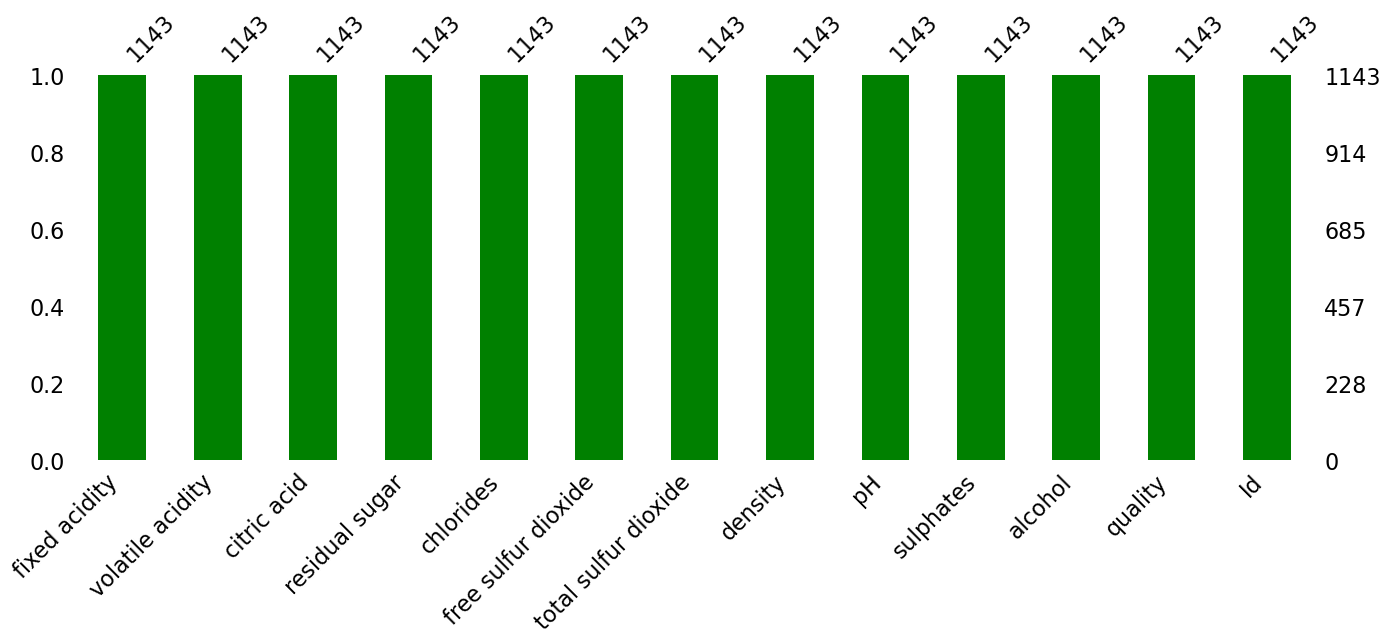

In [9]:
msno.bar(df, figsize=(16, 5), color="green")
plt.show()

In [11]:
#All columns 
col_list = list(df.columns.values)
col_list

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'Id']

IndexError: index 11 is out of bounds for axis 0 with size 11

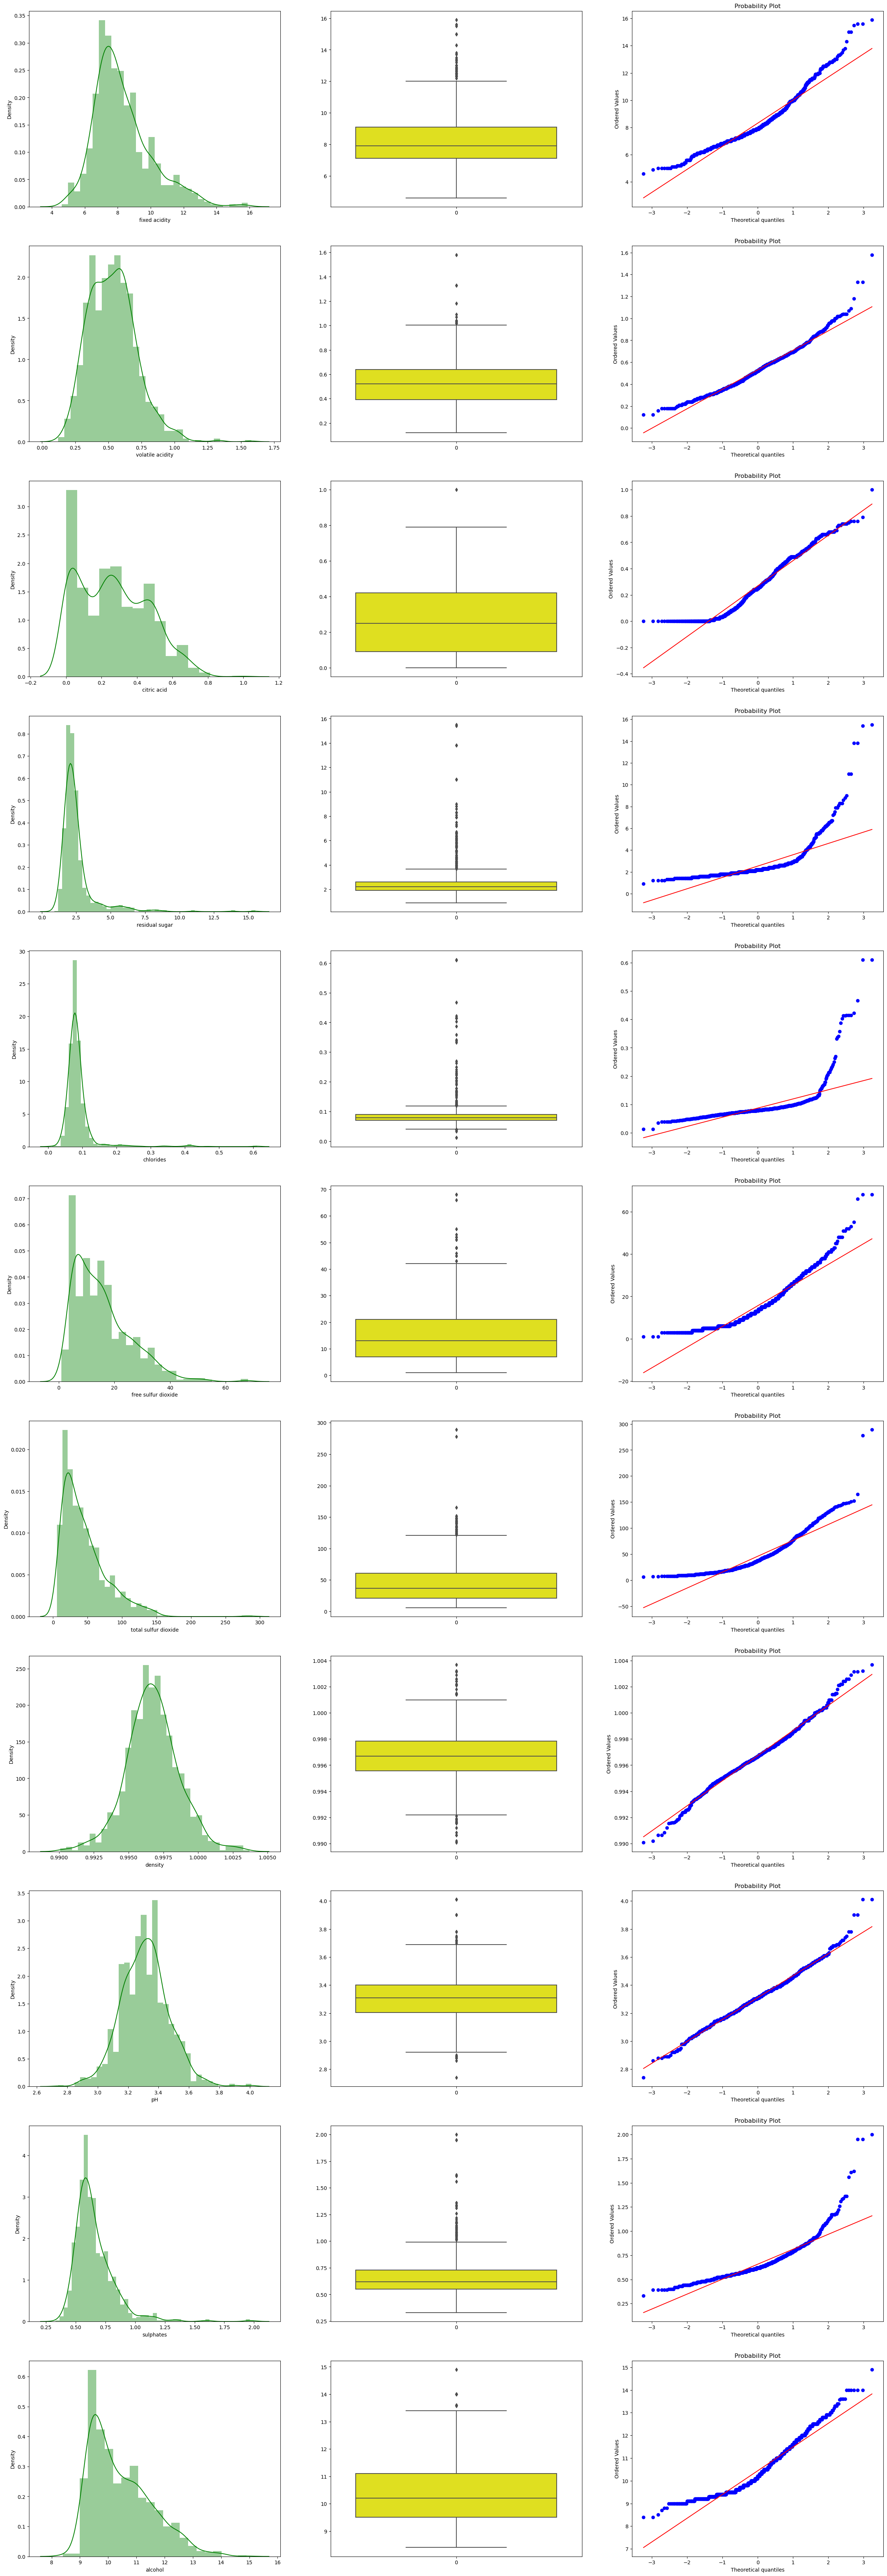

In [12]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(11,3,figsize=(30,90))
for index,i in enumerate(col_list): 
    sns.distplot(df[i],ax=ax[index,0],color='green')
    sns.boxplot(df[i],ax=ax[index,1],color='yellow')
    stats.probplot(df[i],plot=ax[index,2])
fig.tight_layout()
plt.suptitle("Uni-Variate Analysis of continuous variables")

<Axes: title={'center': 'Quality'}>

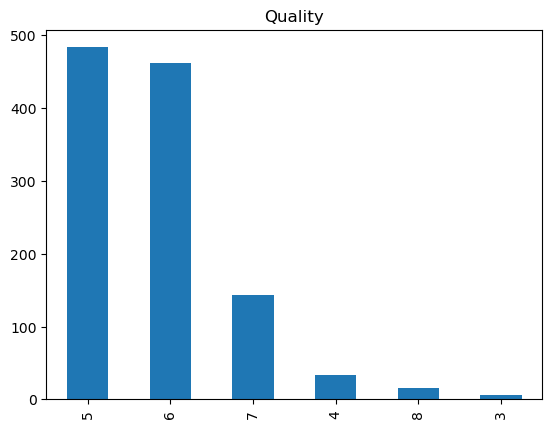

In [13]:
df['quality'].value_counts().plot(kind='bar', title='Quality')

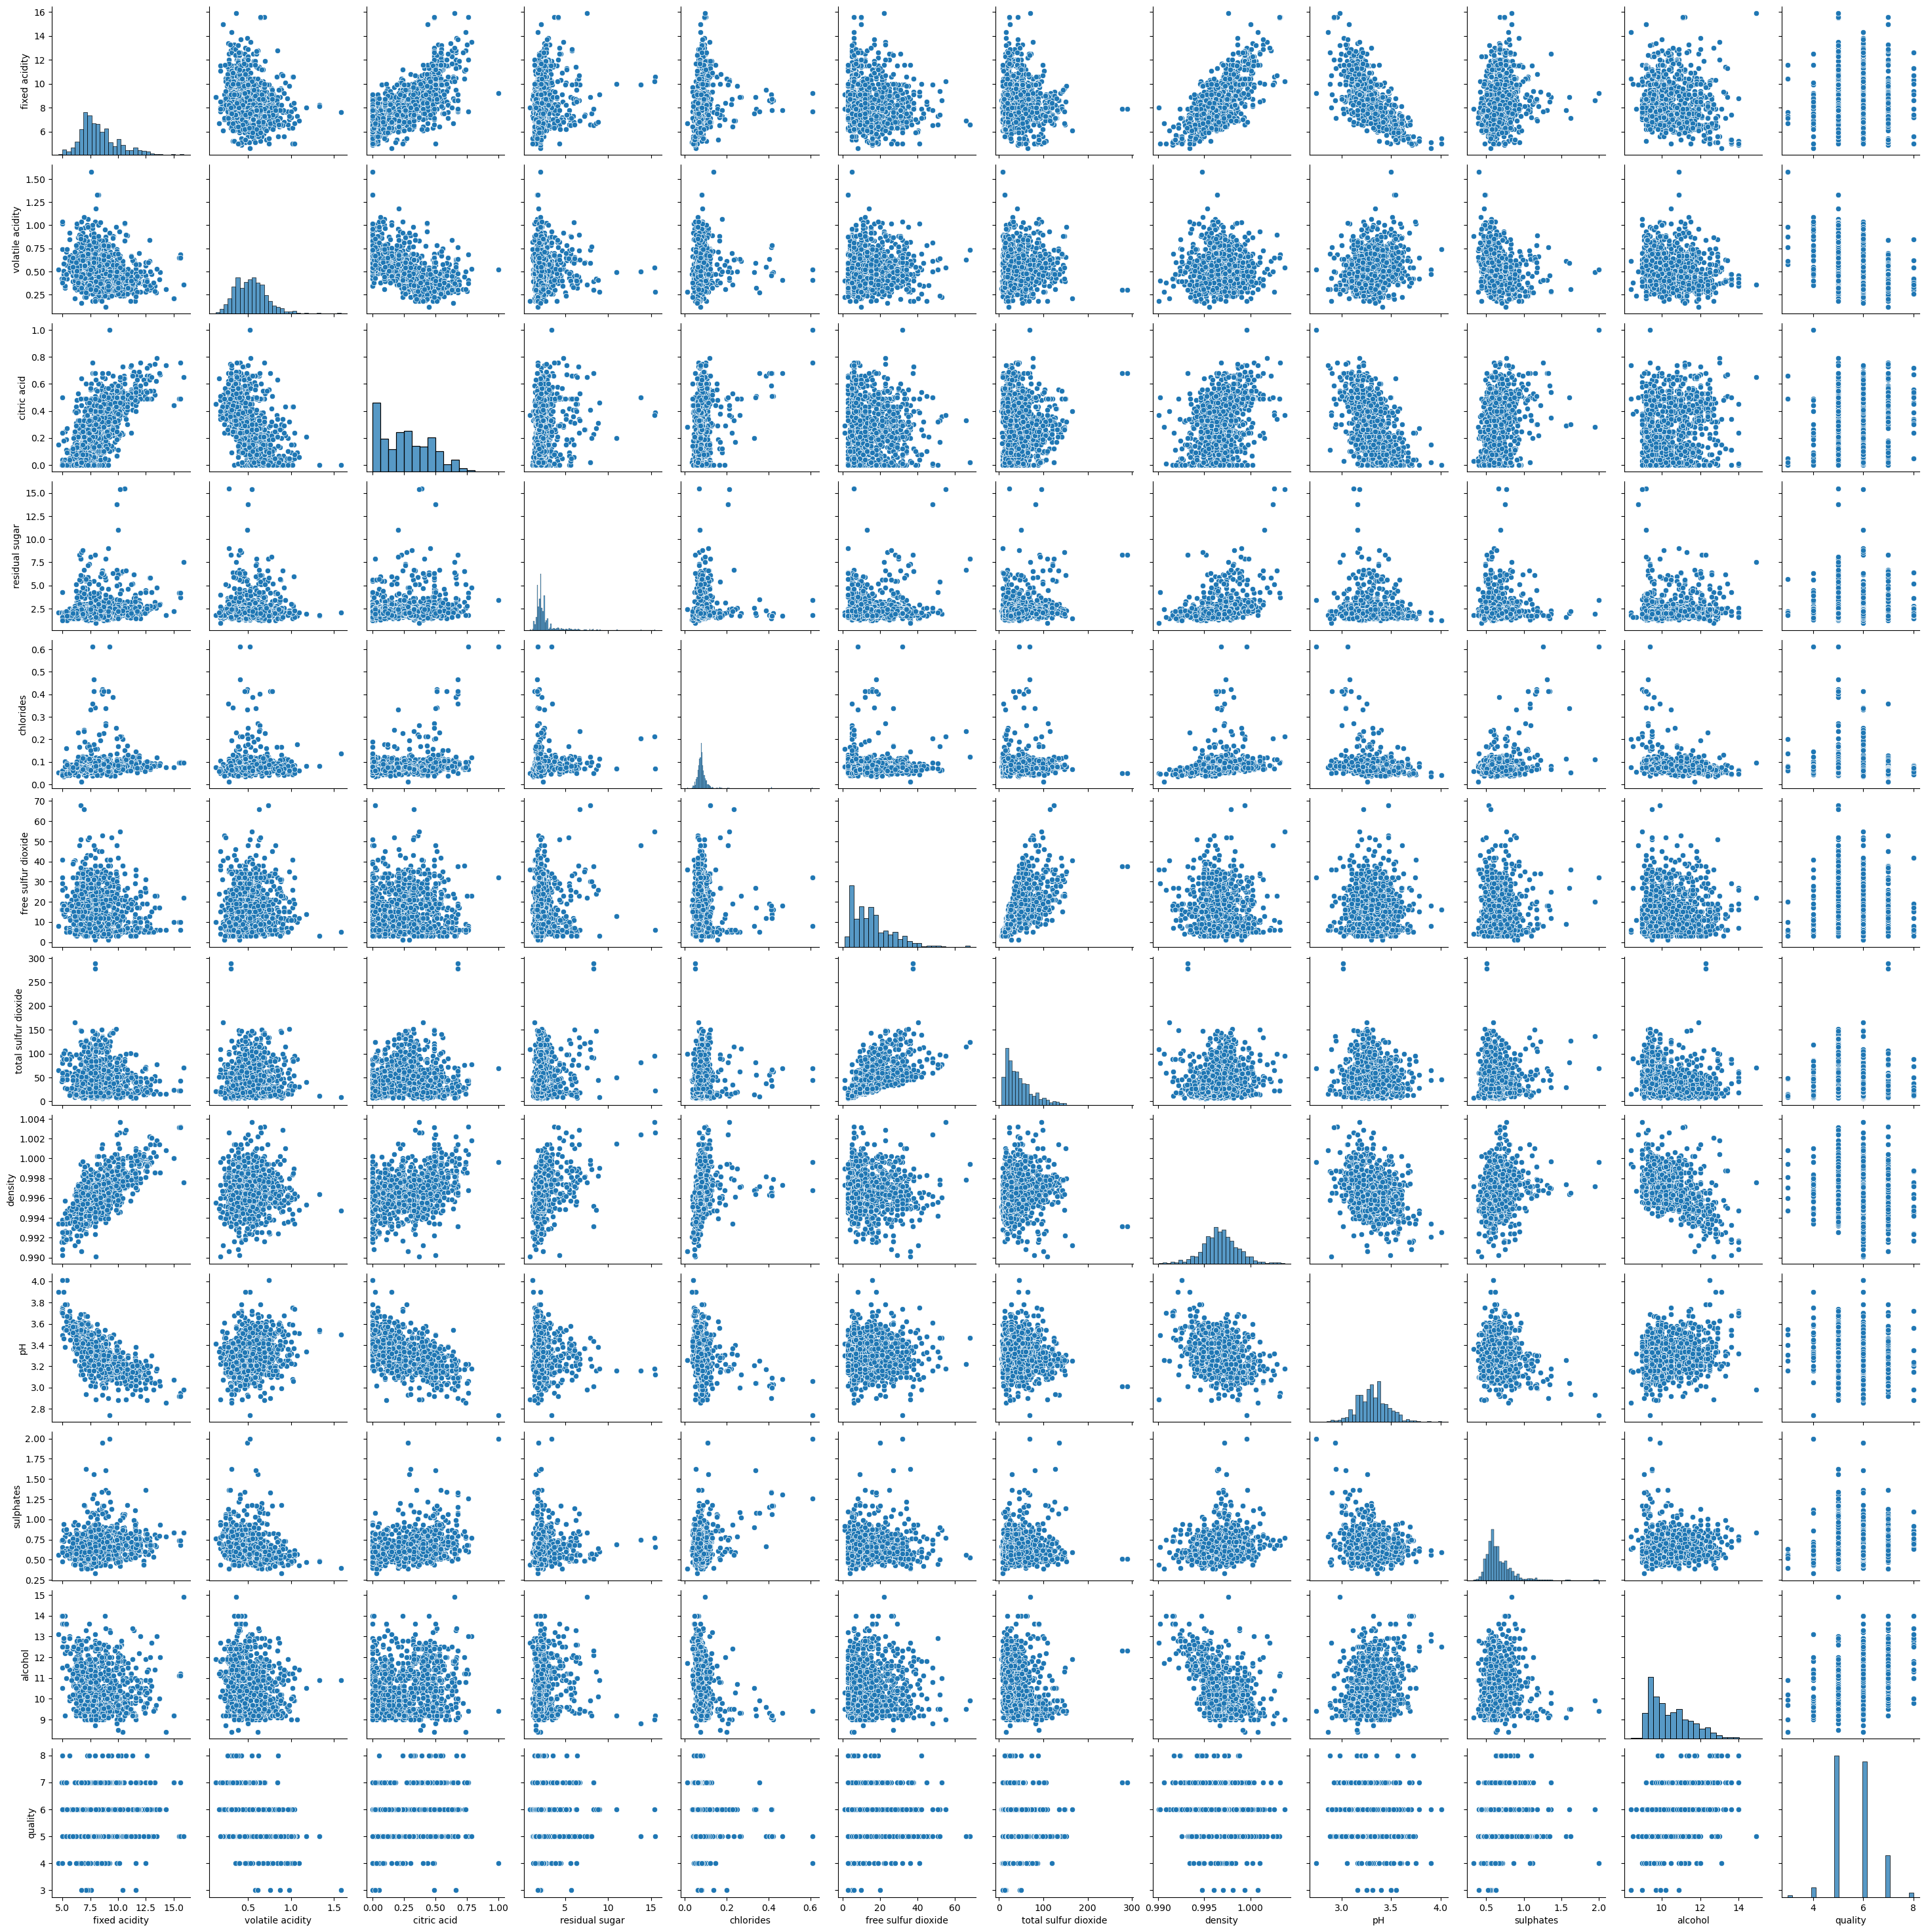

In [14]:
sns.pairplot(df[df.columns[:-1]])
plt.show()

In [15]:
correlation_matrix = df.corr()
print(correlation_matrix['quality'].sort_values(ascending=False))

quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
Id                      0.069708
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64


In [16]:
X = df.drop('quality', axis=1)
y = df['quality']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [24]:
pip install optuna


Note: you may need to restart the kernel to use updated packages.Collecting optuna
     -------------------------------------- 404.2/404.2 kB 4.2 MB/s eta 0:00:00
     -------------------------------------- 226.0/226.0 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 78.7/78.7 kB 4.3 MB/s eta 0:00:00



In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import optuna
from sklearn.metrics import accuracy_score

In [28]:
def objective_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    
    return -accuracy_score(y_test, y_pred)  # Minimize negative accuracy

def objective_svm(trial):
    C = trial.suggest_loguniform('C', 1e-3, 1e3)
    gamma = trial.suggest_loguniform('gamma', 1e-4, 1e1)
    
    model = SVC(C=C, gamma=gamma, random_state=42)
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    
    return -accuracy_score(y_test, y_pred)

def objective_lr(trial):
    C = trial.suggest_loguniform('C', 1e-3, 1e3)
    
    model = LogisticRegression(C=C, random_state=42)
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    
    return -accuracy_score(y_test, y_pred)

In [30]:
study_rf = optuna.create_study(direction='minimize')
study_rf.optimize(objective_rf, n_trials=100)

study_svm = optuna.create_study(direction='minimize')
study_svm.optimize(objective_svm, n_trials=100)

study_lr = optuna.create_study(direction='minimize')
study_lr.optimize(objective_lr, n_trials=100)

[I 2023-09-09 22:50:27,731] A new study created in memory with name: no-name-5325600e-5083-4b28-ae2f-fbbec93d2b68
[I 2023-09-09 22:50:31,234] Trial 0 finished with value: -0.62882096069869 and parameters: {'n_estimators': 237, 'max_depth': 17}. Best is trial 0 with value: -0.62882096069869.
[I 2023-09-09 22:50:34,186] Trial 1 finished with value: -0.6331877729257642 and parameters: {'n_estimators': 244, 'max_depth': 18}. Best is trial 1 with value: -0.6331877729257642.
[I 2023-09-09 22:50:37,118] Trial 2 finished with value: -0.3930131004366812 and parameters: {'n_estimators': 424, 'max_depth': 4}. Best is trial 1 with value: -0.6331877729257642.
[I 2023-09-09 22:50:40,399] Trial 3 finished with value: -0.6069868995633187 and parameters: {'n_estimators': 462, 'max_depth': 10}. Best is trial 1 with value: -0.6331877729257642.
[I 2023-09-09 22:50:43,316] Trial 4 finished with value: -0.6419213973799127 and parameters: {'n_estimators': 388, 'max_depth': 12}. Best is trial 4 with value: -0

[I 2023-09-09 22:52:31,182] Trial 45 finished with value: -0.611353711790393 and parameters: {'n_estimators': 373, 'max_depth': 9}. Best is trial 12 with value: -0.6462882096069869.
[I 2023-09-09 22:52:34,806] Trial 46 finished with value: -0.6244541484716157 and parameters: {'n_estimators': 484, 'max_depth': 15}. Best is trial 12 with value: -0.6462882096069869.
[I 2023-09-09 22:52:38,156] Trial 47 finished with value: -0.6331877729257642 and parameters: {'n_estimators': 439, 'max_depth': 19}. Best is trial 12 with value: -0.6462882096069869.
[I 2023-09-09 22:52:40,907] Trial 48 finished with value: -0.611353711790393 and parameters: {'n_estimators': 355, 'max_depth': 13}. Best is trial 12 with value: -0.6462882096069869.
[I 2023-09-09 22:52:43,911] Trial 49 finished with value: -0.6375545851528385 and parameters: {'n_estimators': 384, 'max_depth': 17}. Best is trial 12 with value: -0.6462882096069869.
[I 2023-09-09 22:52:47,419] Trial 50 finished with value: -0.6375545851528385 and p

[I 2023-09-09 22:54:45,867] Trial 90 finished with value: -0.62882096069869 and parameters: {'n_estimators': 451, 'max_depth': 19}. Best is trial 61 with value: -0.6506550218340611.
[I 2023-09-09 22:54:49,149] Trial 91 finished with value: -0.6419213973799127 and parameters: {'n_estimators': 468, 'max_depth': 20}. Best is trial 61 with value: -0.6506550218340611.
[I 2023-09-09 22:54:52,478] Trial 92 finished with value: -0.6462882096069869 and parameters: {'n_estimators': 480, 'max_depth': 20}. Best is trial 61 with value: -0.6506550218340611.
[I 2023-09-09 22:54:55,778] Trial 93 finished with value: -0.6375545851528385 and parameters: {'n_estimators': 463, 'max_depth': 19}. Best is trial 61 with value: -0.6506550218340611.
[I 2023-09-09 22:54:58,857] Trial 94 finished with value: -0.6419213973799127 and parameters: {'n_estimators': 437, 'max_depth': 18}. Best is trial 61 with value: -0.6506550218340611.
[I 2023-09-09 22:55:02,423] Trial 95 finished with value: -0.6375545851528385 and 

[I 2023-09-09 22:55:23,870] Trial 32 finished with value: -0.6157205240174672 and parameters: {'C': 111.5249432026044, 'gamma': 0.2650335460829114}. Best is trial 13 with value: -0.6593886462882096.
[I 2023-09-09 22:55:24,042] Trial 33 finished with value: -0.6724890829694323 and parameters: {'C': 39.19715822480913, 'gamma': 0.07007624968208152}. Best is trial 33 with value: -0.6724890829694323.
[I 2023-09-09 22:55:24,216] Trial 34 finished with value: -0.6419213973799127 and parameters: {'C': 15.02728010572467, 'gamma': 0.06931328231318411}. Best is trial 33 with value: -0.6724890829694323.
[I 2023-09-09 22:55:24,515] Trial 35 finished with value: -0.62882096069869 and parameters: {'C': 179.03423464274238, 'gamma': 0.6929759517367686}. Best is trial 33 with value: -0.6724890829694323.
[I 2023-09-09 22:55:24,718] Trial 36 finished with value: -0.6375545851528385 and parameters: {'C': 9.814489137266378, 'gamma': 0.2483352069934274}. Best is trial 33 with value: -0.6724890829694323.
[I 2

[I 2023-09-09 22:55:32,987] Trial 74 finished with value: -0.6506550218340611 and parameters: {'C': 12.906317739744551, 'gamma': 0.06831178425882047}. Best is trial 33 with value: -0.6724890829694323.
[I 2023-09-09 22:55:33,191] Trial 75 finished with value: -0.6244541484716157 and parameters: {'C': 44.39836988277747, 'gamma': 0.34430371467830057}. Best is trial 33 with value: -0.6724890829694323.
[I 2023-09-09 22:55:33,348] Trial 76 finished with value: -0.6419213973799127 and parameters: {'C': 28.649825054604364, 'gamma': 0.15119114537504627}. Best is trial 33 with value: -0.6724890829694323.
[I 2023-09-09 22:55:33,599] Trial 77 finished with value: -0.6462882096069869 and parameters: {'C': 181.79403519577835, 'gamma': 0.054587257794989526}. Best is trial 33 with value: -0.6724890829694323.
[I 2023-09-09 22:55:33,788] Trial 78 finished with value: -0.6157205240174672 and parameters: {'C': 104.84583578715066, 'gamma': 0.22926408682467775}. Best is trial 33 with value: -0.6724890829694

[I 2023-09-09 22:55:39,095] Trial 17 finished with value: -0.4410480349344978 and parameters: {'C': 90.07156645399215}. Best is trial 1 with value: -0.44541484716157204.
[I 2023-09-09 22:55:39,141] Trial 18 finished with value: -0.4410480349344978 and parameters: {'C': 888.1429834215617}. Best is trial 1 with value: -0.44541484716157204.
[I 2023-09-09 22:55:39,173] Trial 19 finished with value: -0.2838427947598253 and parameters: {'C': 0.001240531539795699}. Best is trial 1 with value: -0.44541484716157204.
[I 2023-09-09 22:55:39,236] Trial 20 finished with value: -0.4192139737991266 and parameters: {'C': 2.8776240493956}. Best is trial 1 with value: -0.44541484716157204.
[I 2023-09-09 22:55:39,298] Trial 21 finished with value: -0.4410480349344978 and parameters: {'C': 113.34084278977517}. Best is trial 1 with value: -0.44541484716157204.
[I 2023-09-09 22:55:39,361] Trial 22 finished with value: -0.4366812227074236 and parameters: {'C': 248.64125048107965}. Best is trial 1 with value:

[I 2023-09-09 22:55:42,156] Trial 66 finished with value: -0.4410480349344978 and parameters: {'C': 42.41637392024899}. Best is trial 37 with value: -0.4497816593886463.
[I 2023-09-09 22:55:42,219] Trial 67 finished with value: -0.4366812227074236 and parameters: {'C': 398.8854411160942}. Best is trial 37 with value: -0.4497816593886463.
[I 2023-09-09 22:55:42,298] Trial 68 finished with value: -0.44541484716157204 and parameters: {'C': 96.06002002092798}. Best is trial 37 with value: -0.4497816593886463.
[I 2023-09-09 22:55:42,376] Trial 69 finished with value: -0.43231441048034935 and parameters: {'C': 232.63901845402398}. Best is trial 37 with value: -0.4497816593886463.
[I 2023-09-09 22:55:42,439] Trial 70 finished with value: -0.4366812227074236 and parameters: {'C': 956.3459470360706}. Best is trial 37 with value: -0.4497816593886463.
[I 2023-09-09 22:55:42,502] Trial 71 finished with value: -0.44541484716157204 and parameters: {'C': 133.01920530282746}. Best is trial 37 with val

### Now we have a list of all trials with their parameters

In [31]:
print("Random Forest - Best trial:")
print(study_rf.best_trial.params)
print("Accuracy:", -study_rf.best_value)

print("SVM - Best trial:")
print(study_svm.best_trial.params)
print("Accuracy:", -study_svm.best_value)

print("Linear Regression - Best trial:")
print(study_lr.best_trial.params)
print("Accuracy:", -study_lr.best_value)

Random Forest - Best trial:
{'n_estimators': 407, 'max_depth': 20}
Accuracy: 0.6506550218340611
SVM - Best trial:
{'C': 15.334813491382658, 'gamma': 0.11005391120826266}
Accuracy: 0.6768558951965066
Linear Regression - Best trial:
{'C': 94.69668536403485}
Accuracy: 0.4497816593886463


In [32]:
print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train_resampled shape:", y_train_resampled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled shape: (914, 12)
y_train_resampled shape: (2322,)
X_test_scaled shape: (229, 12)


In [37]:
best_rf_params = study_rf.best_params
best_svm_params = study_svm.best_params
best_lr_params = study_lr.best_params

In [38]:
best_rf_model = RandomForestClassifier(**best_rf_params, random_state=42)
best_svm_model = SVC(**best_svm_params, random_state=42)
best_lr_model = LogisticRegression(**best_lr_params, random_state=42)
# Initialize models with best parameters

In [39]:
best_rf_model.fit(X_train_resampled, y_train_resampled)
best_svm_model.fit(X_train_resampled, y_train_resampled)
best_lr_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=94.69668536403485, random_state=42)

In [43]:
final_rf_preds = best_rf_model.predict(X_test_scaled)
final_svm_preds = best_svm_model.predict(X_test_scaled)
final_lr_preds = best_lr_model.predict(X_test_scaled)

In [44]:
from sklearn.metrics import classification_report

In [45]:
rf_classification_report = classification_report(y_test, final_rf_preds)
svm_classification_report = classification_report(y_test, final_svm_preds)
lr_classification_report = classification_report(y_test, final_lr_preds)

In [46]:
print("Random Forest Classification Report:\n", rf_classification_report)
print("SVM Classification Report:\n", svm_classification_report)
print("Linear Regression Classification Report:\n", lr_classification_report)

Random Forest Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         6
           5       0.75      0.77      0.76        96
           6       0.68      0.57      0.62        99
           7       0.51      0.73      0.60        26
           8       0.00      0.00      0.00         2

    accuracy                           0.65       229
   macro avg       0.32      0.34      0.33       229
weighted avg       0.67      0.65      0.65       229

SVM Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         6
           5       0.74      0.73      0.74        96
           6       0.68      0.68      0.68        99
           7       0.67      0.69      0.68        26
           8       0.00      0.00      0.00         2

    accurac